# EOF reconstruction of emulated data
Here we want to reconstruct the data emulated with'ENSEMBLE2_MultiLinReg_EOF1.ipynb' based on the PCs emulated and the eof from the CNRM-CM6-1 PPE ensemble. We start with TOA net radiative fluxes. 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# EOF and N_mean

In [20]:
eof1 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap1_N.npy').to_xarray().to_array()
eof2 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap2_N.npy').to_xarray().to_array()
eof3 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap3_N.npy').to_xarray().to_array()
eof4 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap4_N.npy').to_xarray().to_array()
eof5 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap5_N.npy').to_xarray().to_array()

eof1 = eof1[0,:,:].rename({'variable':'mode'})
eof2 = eof2[0,:,:].rename({'variable':'mode'})
eof3 = eof3[0,:,:].rename({'variable':'mode'})
eof4 = eof4[0,:,:].rename({'variable':'mode'})
eof5 = eof5[0,:,:].rename({'variable':'mode'})

In [21]:
N_mean =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_N_mean.npy').to_xarray().to_array()
N_mean = N_mean[0,:,:].rename({'variable':'mode'})

# Multi-Linear Regression predictions

## Import PCs and EOFs

In [3]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof1.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof2.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof3.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof4.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_eof5.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

pc1 = PC_df['pc1'].to_xarray().rename({'index':'mode'})
pc2 = PC_df['pc2'].to_xarray().rename({'index':'mode'})
pc3 = PC_df['pc3'].to_xarray().rename({'index':'mode'})
pc4 = PC_df['pc4'].to_xarray().rename({'index':'mode'})
pc5 = PC_df['pc5'].to_xarray().rename({'index':'mode'})

## Reconstruction

In [6]:
Recon_data = eof1*pc1 + eof2*pc2 + eof3*pc3 + eof4*pc4 + eof5*pc5
Recon_data = Recon_data + N_mean
Recon_data

<xarray.DataArray (lat: 128, lon: 256, mode: 1000)>
array([[[ -94.92794796,  -94.75504401,  -96.45973955, ...,
          -93.44958179,  -95.31535755,  -96.28784524],
        [ -94.92794796,  -94.75504401,  -96.45973955, ...,
          -93.44958179,  -95.31535755,  -96.28784524],
        [ -94.92794796,  -94.75504401,  -96.45973955, ...,
          -93.44958179,  -95.31535755,  -96.28784524],
        ...,
        [ -94.92794796,  -94.75504401,  -96.45973955, ...,
          -93.44958179,  -95.31535755,  -96.28784524],
        [ -94.92794796,  -94.75504401,  -96.45973955, ...,
          -93.44958179,  -95.31535755,  -96.28784524],
        [ -94.92794796,  -94.75504401,  -96.45973955, ...,
          -93.44958179,  -95.31535755,  -96.28784524]],

       [[ -93.5249717 ,  -93.21388294,  -93.1043937 , ...,
          -91.19542492,  -92.91711008,  -94.13774791],
        [ -93.5249717 ,  -93.21388294,  -93.1043937 , ...,
          -91.19542492,  -92.91711008,  -94.13774791],
        [ -93.5249717 ,  -93.21388294,  -93.1043937 , ...,
          -91.19542492,  -92.91711008,  -94.13774791],
        ...,
        [ -93.5249717 ,  -93.21388294,  -93.1043937 , ...,
          -91.19542492,  -92.91711008,  -94.13774791],
        [ -93.5249717 ,  -93.21388294,  -93.1043937 , ...,
          -91.19542492,  -92.91711008,  -94.13774791],
        [ -93.5249717 ,  -93.21388294,  -93.1043937 , ...,
          -91.19542492,  -92.91711008,  -94.13774791]],

       [[ -97.62264874,  -96.36987393,  -96.75397977, ...,
          -93.87100948,  -95.60496336,  -98.40860484],
        [ -97.62264874,  -96.36987393,  -96.75397977, ...,
          -93.87100948,  -95.60496336,  -98.40860484],
        [ -97.62264874,  -96.36987393,  -96.75397977, ...,
          -93.87100948,  -95.60496336,  -98.40860484],
        ...,
        [ -98.65170028,  -97.3384139 ,  -97.53631481, ...,
          -94.8181753 ,  -96.49239431,  -99.31536664],
        [ -97.62264874,  -96.36987393,  -96.75397977, ...,
          -93.87100948,  -95.60496336,  -98.40860484],
        [ -97.62264874,  -96.36987393,  -96.75397977, ...,
          -93.87100948,  -95.60496336,  -98.40860484]],

       ...,

       [[-134.27922057, -132.61728762, -130.77504063, ...,
         -132.96440801, -131.48583323, -132.77073142],
        [-134.27922057, -132.61728762, -130.77504063, ...,
         -132.96440801, -131.48583323, -132.77073142],
        [-134.27922057, -132.61728762, -130.77504063, ...,
         -132.96440801, -131.48583323, -132.77073142],
        ...,
        [-133.79131721, -132.06445503, -130.22571803, ...,
         -132.4169475 , -130.92375795, -132.26129971],
        [-134.27922057, -132.61728762, -130.77504063, ...,
         -132.96440801, -131.48583323, -132.77073142],
        [-134.27922057, -132.61728762, -130.77504063, ...,
         -132.96440801, -131.48583323, -132.77073142]],

       [[-135.1676885 , -133.24188864, -131.43156091, ...,
         -133.43875633, -132.0187886 , -133.66027711],
        [-135.1676885 , -133.24188864, -131.43156091, ...,
         -133.43875633, -132.0187886 , -133.66027711],
        [-135.1676885 , -133.24188864, -131.43156091, ...,
         -133.43875633, -132.0187886 , -133.66027711],
        ...,
        [-135.1676885 , -133.24188864, -131.43156091, ...,
         -133.43875633, -132.0187886 , -133.66027711],
        [-135.1676885 , -133.24188864, -131.43156091, ...,
         -133.43875633, -132.0187886 , -133.66027711],
        [-135.1676885 , -133.24188864, -131.43156091, ...,
         -133.43875633, -132.0187886 , -133.66027711]],

       [[-133.980004  , -131.90129689, -130.54328623, ...,
         -132.22594581, -130.85747063, -132.62302874],
        [-133.980004  , -131.90129689, -130.54328623, ...,
         -132.22594581, -130.85747063, -132.62302874],
        [-133.980004  , -131.90129689, -130.54328623, ...,
         -132.22594581, -130.85747063, -132.62302874],
        ...,
        [-133.980004  , -131.90129689, -130.54328623, ...,
         -132.22594581, -1

# Calcul de biais CERES

In [7]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [8]:
path_observation = '/data/home/globc/peatier/obs_data/'
filename = 'CERES_EBAF-TOA_Ed4.1_Subset_200003-201910_regrid.nc'
    
# Load data and compute Annual Cycle :
file = xr.open_mfdataset(path_observation+filename,combine='by_coords')
#file
variables = ['toa_sw_all_mon','toa_lw_all_mon', 'toa_net_all_mon']
df_obs = load_monthly_clim(path_observation, filename, variables)
df_obs

toa_sw_all_mon  toa_lw_all_mon  toa_net_all_mon
month lat        lon                                                       
1     -88.927735 0.00000        344.953522      189.246185       -38.599289
                 1.40625        344.953522      189.246185       -38.599289
                 2.81250        344.953522      189.246185       -38.599289
                 4.21875        344.992493      189.144440       -38.531315
                 5.62500        345.007721      189.104630       -38.504715
...                                    ...             ...              ...
12     88.927735 352.96875        0.000000      171.476639      -171.476639
                 354.37500        0.000000      171.476639      -171.476639
                 355.78125        0.000000      171.500351      -171.500351
                 357.18750        0.000000      171.560974      -171.560974
                 358.59375        0.000000      171.560974      -171.560974

[393216 rows x 3 columns]

In [9]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
obs

<xarray.Dataset>
Dimensions:          (lat: 128, lon: 256)
Coordinates:
  * lat              (lat) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon              (lon) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
Data variables:
    toa_sw_all_mon   (lat, lon) float32 121.35958 121.35958 ... 103.85324
    toa_lw_all_mon   (lat, lon) float32 142.8201 142.8201 ... 194.14125
    toa_net_all_mon  (lat, lon) float32 -91.40278 -91.40278 ... -126.49493

In [10]:
biases_N = Recon_data - obs['toa_net_all_mon']
biases_N = biases_N.to_dataframe(name = 'bias_N')
biases_N

bias_N
lat        lon       mode          
-88.927735 0.00000   0    -3.525169
                     1    -3.352265
                     2    -5.056961
                     3    -4.454285
                     4    -3.950178
...                             ...
 88.927735 358.59375 995  -6.941230
                     996  -4.784871
                     997  -5.731019
                     998  -4.362544
                     999  -6.128102

[32768000 rows x 1 columns]

In [11]:
#...................................................................
# GLOBAL MEAN WEIGHTED WITH COS(LAT)

import xarray as xr
import numpy as np
import pandas as pd


def wavg(df, start_yr, variables):
    # First, we need to convert latitude to radians and the time into year
    df1=df.reset_index(level=[ 'lat'])
    df1['latr'] = np.deg2rad(df1['lat']) # lat in radians 


    # Then, we find the zonal mean by averaging along the latitude circles
    df2=df1.groupby(['mode', 'lat']).mean()

    # Finally, we use the cosine of the converted latitudes as weights for the average
    df2['weights'] = np.cos(df2['latr'])
    result=pd.DataFrame()
    df2_tmp=df2.groupby(['mode']).mean()
    result[variables]=df2_tmp[variables]
    N=len(result)
    YR=start_yr
    i=0
    while i < N:
        yr=YR+i
        tmp=df2.loc[yr]
        n=len(variables)
        j=0
        while j < n:
            t = (tmp[variables[j]]*tmp['weights']).sum()/tmp['weights'].sum()
            result[variables[j]].iloc[i]=t
            j = j + 1
        i = i + 1

    #r = result.mean()
    return result

In [17]:
variables = ['bias_N']
df = biases_N.abs()
pred_bias_N = wavg(df,0,variables)


Feedbacks_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_FdbckN.npy")
pred_bias_N['Fdbck'] = Feedbacks_pred
pred_bias_N

,bias_N,Fdbck
mode,,
0,20.511616,-1.228678
1,16.663408,-1.125505
2,10.138370,-1.523323
3,11.346122,-1.144006
4,11.504262,-1.372411
...,...,...
995,13.785731,-1.184345
996,13.934250,-1.501268
997,10.613925,-1.139926


In [18]:
PPE_bias_N = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_bias_N.npy')
Feedbacks = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")

PPE_Bias_df = pd.DataFrame(PPE_bias_N, columns=['bias_N'])
PPE_Bias_df['Fdbck'] = Feedbacks
PPE_Bias_df

,bias_N,Fdbck
0,22.680768,-0.789073
1,15.279618,-1.666454
2,18.777535,-1.214114
3,16.074992,-1.292415
4,18.009851,-0.756525
...,...,...
63,13.045434,-1.321747
64,16.325236,-1.604550
65,13.121681,-1.118935
66,11.967703,-1.279246


# LASSO predictions

In [41]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof1.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof2.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof3.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof4.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_eof5.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

pc1 = PC_df['pc1'].to_xarray().rename({'index':'mode'})
pc2 = PC_df['pc2'].to_xarray().rename({'index':'mode'})
pc3 = PC_df['pc3'].to_xarray().rename({'index':'mode'})
pc4 = PC_df['pc4'].to_xarray().rename({'index':'mode'})
pc5 = PC_df['pc5'].to_xarray().rename({'index':'mode'})

In [42]:
Recon_data = eof1*pc1 + eof2*pc2 + eof3*pc3 + eof4*pc4 + eof5*pc5
Recon_data = Recon_data + N_mean
Recon_data

<xarray.DataArray (lat: 128, lon: 256, mode: 1000)>
array([[[ -95.07355168,  -94.84659101,  -95.93250207, ...,
          -94.07390418,  -95.12761529,  -96.33900521],
        [ -95.07355168,  -94.84659101,  -95.93250207, ...,
          -94.07390418,  -95.12761529,  -96.33900521],
        [ -95.07355168,  -94.84659101,  -95.93250207, ...,
          -94.07390418,  -95.12761529,  -96.33900521],
        ...,
        [ -95.07355168,  -94.84659101,  -95.93250207, ...,
          -94.07390418,  -95.12761529,  -96.33900521],
        [ -95.07355168,  -94.84659101,  -95.93250207, ...,
          -94.07390418,  -95.12761529,  -96.33900521],
        [ -95.07355168,  -94.84659101,  -95.93250207, ...,
          -94.07390418,  -95.12761529,  -96.33900521]],

       [[ -93.09538962,  -92.65823915,  -92.85704232, ...,
          -91.61855319,  -92.3284203 ,  -93.84450971],
        [ -93.09538962,  -92.65823915,  -92.85704232, ...,
          -91.61855319,  -92.3284203 ,  -93.84450971],
        [ -93.09538962,  -92.65823915,  -92.85704232, ...,
          -91.61855319,  -92.3284203 ,  -93.84450971],
        ...,
        [ -93.09538962,  -92.65823915,  -92.85704232, ...,
          -91.61855319,  -92.3284203 ,  -93.84450971],
        [ -93.09538962,  -92.65823915,  -92.85704232, ...,
          -91.61855319,  -92.3284203 ,  -93.84450971],
        [ -93.09538962,  -92.65823915,  -92.85704232, ...,
          -91.61855319,  -92.3284203 ,  -93.84450971]],

       [[ -96.96513849,  -95.87104632,  -96.44602034, ...,
          -94.6991854 ,  -95.45502922,  -97.8197521 ],
        [ -96.96513849,  -95.87104632,  -96.44602034, ...,
          -94.6991854 ,  -95.45502922,  -97.8197521 ],
        [ -96.96513849,  -95.87104632,  -96.44602034, ...,
          -94.6991854 ,  -95.45502922,  -97.8197521 ],
        ...,
        [ -97.92970251,  -96.79207924,  -97.2769747 , ...,
          -95.61967932,  -96.30801083,  -98.69914208],
        [ -96.96513849,  -95.87104632,  -96.44602034, ...,
          -94.6991854 ,  -95.45502922,  -97.8197521 ],
        [ -96.96513849,  -95.87104632,  -96.44602034, ...,
          -94.6991854 ,  -95.45502922,  -97.8197521 ]],

       ...,

       [[-133.43197985, -132.2801127 , -131.46291348, ...,
         -132.71385684, -131.51196384, -132.13515154],
        [-133.43197985, -132.2801127 , -131.46291348, ...,
         -132.71385684, -131.51196384, -132.13515154],
        [-133.43197985, -132.2801127 , -131.46291348, ...,
         -132.71385684, -131.51196384, -132.13515154],
        ...,
        [-132.92717773, -131.73283957, -130.92546123, ...,
         -132.17332325, -130.95327   , -131.61561126],
        [-133.43197985, -132.2801127 , -131.46291348, ...,
         -132.71385684, -131.51196384, -132.13515154],
        [-133.43197985, -132.2801127 , -131.46291348, ...,
         -132.71385684, -131.51196384, -132.13515154]],

       [[-134.22939699, -132.88381094, -132.12918695, ...,
         -133.26324279, -132.05778971, -132.94562986],
        [-134.22939699, -132.88381094, -132.12918695, ...,
         -133.26324279, -132.05778971, -132.94562986],
        [-134.22939699, -132.88381094, -132.12918695, ...,
         -133.26324279, -132.05778971, -132.94562986],
        ...,
        [-134.22939699, -132.88381094, -132.12918695, ...,
         -133.26324279, -132.05778971, -132.94562986],
        [-134.22939699, -132.88381094, -132.12918695, ...,
         -133.26324279, -132.05778971, -132.94562986],
        [-134.22939699, -132.88381094, -132.12918695, ...,
         -133.26324279, -132.05778971, -132.94562986]],

       [[-133.12395581, -131.69826469, -131.19576711, ...,
         -132.13021126, -130.98211434, -131.95238885],
        [-133.12395581, -131.69826469, -131.19576711, ...,
         -132.13021126, -130.98211434, -131.95238885],
        [-133.12395581, -131.69826469, -131.19576711, ...,
         -132.13021126, -130.98211434, -131.95238885],
        ...,
        [-133.12395581, -131.69826469, -131.19576711, ...,
         -132.13021126, -1

In [43]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [44]:
path_observation = '/data/home/globc/peatier/obs_data/'
filename = 'CERES_EBAF-TOA_Ed4.1_Subset_200003-201910_regrid.nc'
    
# Load data and compute Annual Cycle :
file = xr.open_mfdataset(path_observation+filename,combine='by_coords')
#file
variables = ['toa_sw_all_mon','toa_lw_all_mon', 'toa_net_all_mon']
df_obs = load_monthly_clim(path_observation, filename, variables)
df_obs

toa_sw_all_mon  toa_lw_all_mon  toa_net_all_mon
month lat        lon                                                       
1     -88.927735 0.00000        344.953522      189.246185       -38.599289
                 1.40625        344.953522      189.246185       -38.599289
                 2.81250        344.953522      189.246185       -38.599289
                 4.21875        344.992493      189.144440       -38.531315
                 5.62500        345.007721      189.104630       -38.504715
...                                    ...             ...              ...
12     88.927735 352.96875        0.000000      171.476639      -171.476639
                 354.37500        0.000000      171.476639      -171.476639
                 355.78125        0.000000      171.500351      -171.500351
                 357.18750        0.000000      171.560974      -171.560974
                 358.59375        0.000000      171.560974      -171.560974

[393216 rows x 3 columns]

In [45]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
obs

<xarray.Dataset>
Dimensions:          (lat: 128, lon: 256)
Coordinates:
  * lat              (lat) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon              (lon) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
Data variables:
    toa_sw_all_mon   (lat, lon) float32 121.35958 121.35958 ... 103.85324
    toa_lw_all_mon   (lat, lon) float32 142.8201 142.8201 ... 194.14125
    toa_net_all_mon  (lat, lon) float32 -91.40278 -91.40278 ... -126.49493

In [46]:
biases_N = Recon_data - obs['toa_net_all_mon']
biases_N = biases_N.to_dataframe(name = 'bias_N')
biases_N

bias_N
lat        lon       mode          
-88.927735 0.00000   0    -3.670773
                     1    -3.443812
                     2    -4.529723
                     3    -4.594679
                     4    -3.178936
...                             ...
 88.927735 358.59375 995  -6.739147
                     996  -5.236553
                     997  -5.635285
                     998  -4.487188
                     999  -5.457462

[32768000 rows x 1 columns]

In [47]:
#...................................................................
# GLOBAL MEAN WEIGHTED WITH COS(LAT)

import xarray as xr
import numpy as np
import pandas as pd


def wavg(df, start_yr, variables):
    # First, we need to convert latitude to radians and the time into year
    df1=df.reset_index(level=[ 'lat'])
    df1['latr'] = np.deg2rad(df1['lat']) # lat in radians 


    # Then, we find the zonal mean by averaging along the latitude circles
    df2=df1.groupby(['mode', 'lat']).mean()

    # Finally, we use the cosine of the converted latitudes as weights for the average
    df2['weights'] = np.cos(df2['latr'])
    result=pd.DataFrame()
    df2_tmp=df2.groupby(['mode']).mean()
    result[variables]=df2_tmp[variables]
    N=len(result)
    YR=start_yr
    i=0
    while i < N:
        yr=YR+i
        tmp=df2.loc[yr]
        n=len(variables)
        j=0
        while j < n:
            t = (tmp[variables[j]]*tmp['weights']).sum()/tmp['weights'].sum()
            result[variables[j]].iloc[i]=t
            j = j + 1
        i = i + 1

    #r = result.mean()
    return result

In [48]:
variables = ['bias_N']
df = biases_N.abs()
LASSO_pred_bias_N = wavg(df,0,variables)


Feedbacks_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LASSO_prediction_FdbckN.npy")
LASSO_pred_bias_N['Fdbck'] = Feedbacks_pred
LASSO_pred_bias_N

,bias_N,Fdbck
mode,,
0,14.795992,-1.329823
1,13.327651,-1.210183
2,9.391299,-1.386924
3,11.107490,-1.276381
4,10.490438,-1.357603
...,...,...
995,11.451734,-1.357820
996,11.959084,-1.474612
997,10.790302,-1.251291


In [49]:
PPE_bias_N = np.load('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_bias_N.npy')
Feedbacks = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")

PPE_Bias_df = pd.DataFrame(PPE_bias_N, columns=['bias_N'])
PPE_Bias_df['Fdbck'] = Feedbacks
PPE_Bias_df

,bias_N,Fdbck
0,22.680768,-0.789073
1,15.279618,-1.666454
2,18.777535,-1.214114
3,16.074992,-1.292415
4,18.009851,-0.756525
...,...,...
63,13.045434,-1.321747
64,16.325236,-1.604550
65,13.121681,-1.118935
66,11.967703,-1.279246


# Create Plot

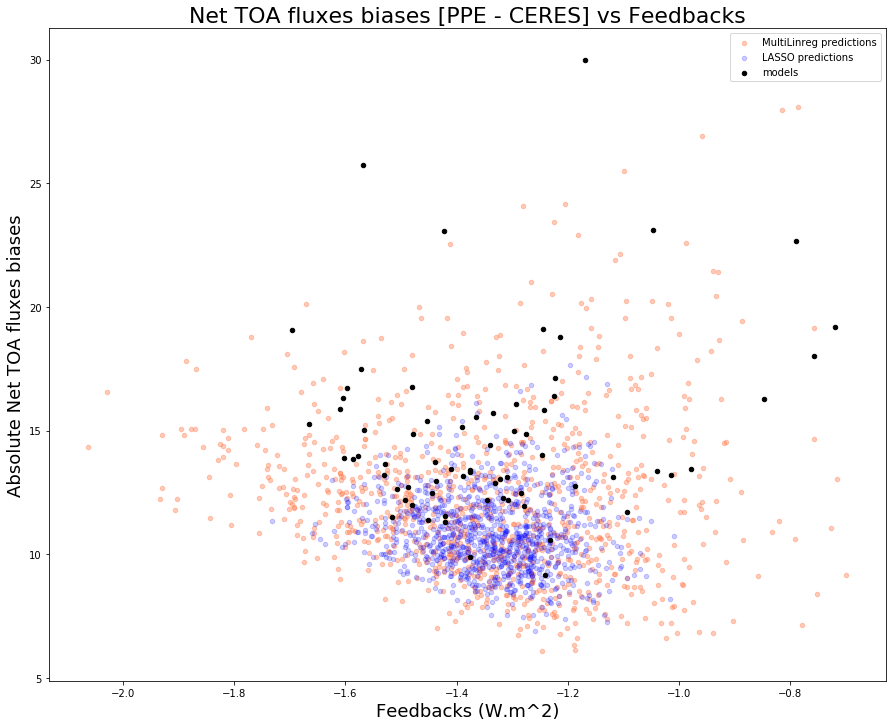

In [50]:
ax = plt.gca()
title = 'Net TOA fluxes biases [PPE - CERES] vs Feedbacks'
pred_bias_N.plot(kind='scatter', x='Fdbck', y='bias_N', color='coral', alpha=0.4, figsize=(15, 12), 
                     style='.', ax = ax)
LASSO_pred_bias_N.plot(kind='scatter', x='Fdbck', y='bias_N', color='blue', alpha=0.2, figsize=(15, 12), 
                     style='.', ax = ax)
PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_N', color='black', figsize=(15, 12), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute Net TOA fluxes biases', fontsize=18)
plt.legend(['MultiLinreg predictions','LASSO predictions', 'models'])
plt.title(title, fontsize=22)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()